## Detection (Yolov5) on BDD-100k-Dataset

For prediction benchmarking YOLO uses `mAP`, some of the attribites of `mAP` are following:
* It uses both `precision` and `recall` to get final `mAP` - that makes it suited for imabalanced dataset.
* Yolo also provides per-class `mAP` so we can check if there is any bias toward majority classes.

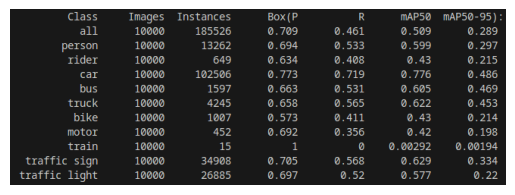

In [1]:
from PIL import Image
from matplotlib import pyplot as plt

im = Image.open("../plots/map_yolo.png")
plt.axis("off")
plt.imshow(im)

We see in above table model performing well for the majority classes at the same time its not doing very poor on the minority classes, except for the `train-class` which does not have much training samples.

__Note:__ Taking weighted map also results in similar values, indicating this matic has also handling imblance in the instance of object pretty well.

In [13]:
map = [0.599, 0.43, 0.776, 0.605, 0.622, 0.43, 0.42, 0.00292, 0.629, 0.577]
ins = [13262, 649, 102506, 1597, 4245, 1007, 452, 15, 34908, 26885]
ins_norm = [x/sum(ins) for x in ins]

map_weighted = [x/y for x, y in zip(map, ins_norm)]
map_norm = sum(map_weighted)/len(map_weighted)
print (f"Weighted mAP50 score= {map_norm:.2f}")



Weighted mAP50 score= 52.52


### Co-relation between no of samples and mAP or a class

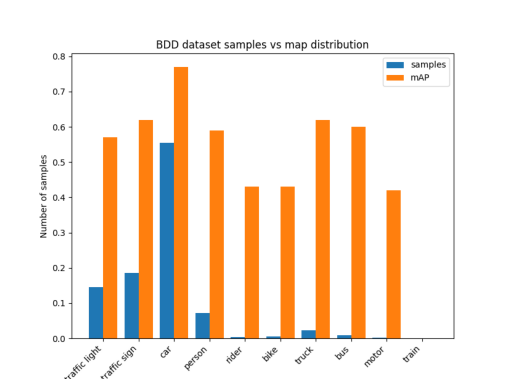

In [4]:
from PIL import Image
from matplotlib import pyplot as plt

im = Image.open("../plots/sample_map_dist.png")
plt.axis("off")
plt.imshow(im)

From above plot we can see that the models performance is following no of samples in training, at the same time its doing much better on minority class, except for train, which has almost no data samples.

### Prediction on Day Vs night dataset

* below data has been genererated by resoding `mAP50` using evaluations script provided in `source/evaluation.py`

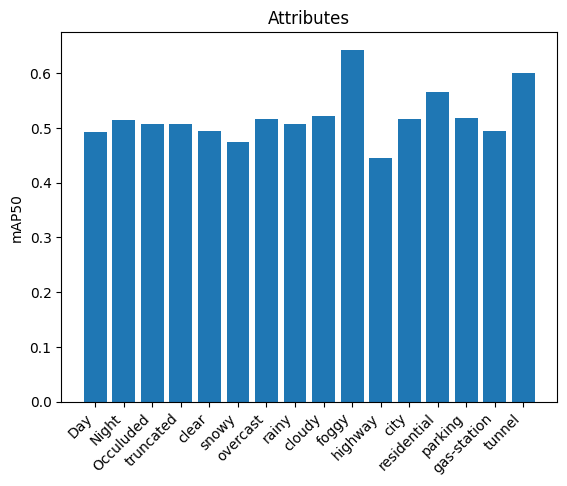

In [44]:
from matplotlib import pyplot as plt

map_day_night = {
    'day': [0.492, 0.393],
    'night': [0.514, 0.607],
    "occuluded": [],
    "trucated": []
}

classes = ["Day", "Night", "Occuluded", "truncated", "clear", 
           "snowy", "overcast", "rainy", "cloudy", "foggy", 
           "highway", "city", "residential", "parking", "gas-station",
           "tunnel"]
maps = [0.492, 0.514, 0.508, 0.508, 0.495, 0.475, 0.517, 0.508, 
        0.522, 0.643, 0.446, 0.516, 0.565, 0.519, 0.494, 0.601]

fig, ax = plt.subplots()
ax.bar(classes, maps)
ax.set_ylabel("mAP50")
ax.set_title("Attributes")
plt.xticks(rotation=45, ha="right")
plt.show()

### Some predictions visualization

1. Person missed on the left and False positive person in right

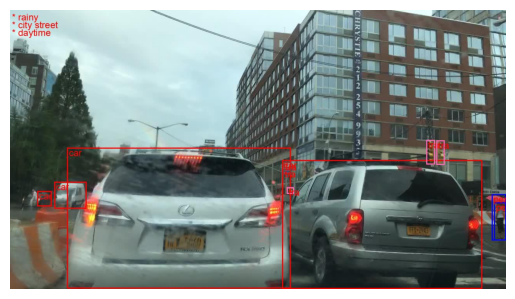

In [1]:
from PIL import Image
from matplotlib import pyplot as plt

im = Image.open("../plots/images/bb2c5719-1244dd67.jpg")
plt.axis("off")
plt.imshow(im)

2. Comparision with annotations

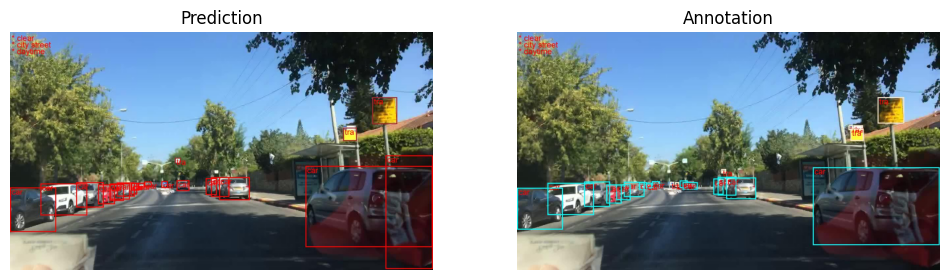

In [4]:
from PIL import Image
from matplotlib import pyplot as plt

im1 = Image.open("../plots/images/c776d10b-6732b55c.jpg")
im2 = Image.open("../plots/images/c776d10b-6732b55c_anns.jpg")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
axes[0].set_axis_off()
axes[0].set_title("Prediction")
axes[0].imshow(im1)
axes[1].set_axis_off()
axes[1].set_title("Annotation")
axes[1].imshow(im2)

Here we can see model is able to campture on of the missing traffic signs it also capture on trucated object in the right, its not clear visually if thats a car.

3. False +ves on small and far predicted objects

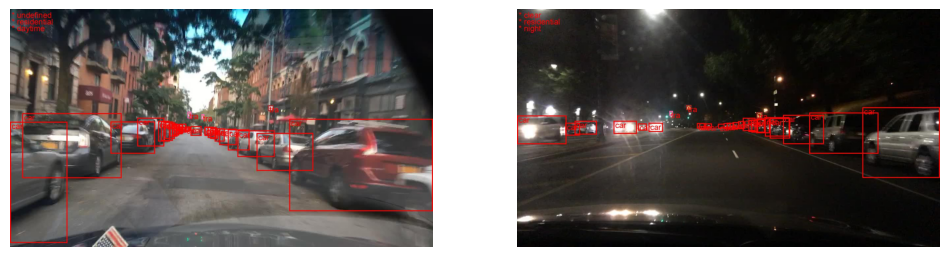

In [7]:
from PIL import Image
from matplotlib import pyplot as plt

im1 = Image.open("../plots/images/b92c7b7c-af420847.jpg")
im2 = Image.open("../plots/images/b59f6555-a562f4f9.jpg")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
axes[0].set_axis_off()
axes[0].imshow(im1)
axes[1].set_axis_off()
axes[1].imshow(im2)

4. Comparision Prediction Vs Annotation

* In Annotation it seems there is one extra person annotated, which model does not.
* While the model predicted a `Jacket` as `person`.

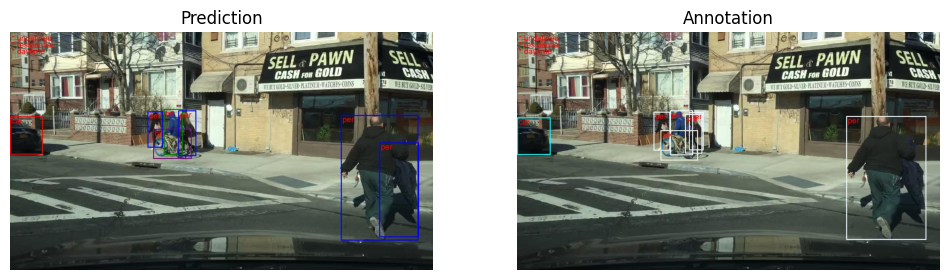

In [8]:
im1 = Image.open("../plots/images/b6e602b3-50bfb157.jpg")
im2 = Image.open("../plots/images/b6e602b3-50bfb157_anns.jpg")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
axes[0].set_axis_off()
axes[0].set_title("Prediction")
axes[0].imshow(im1)
axes[1].set_axis_off()
axes[1].set_title("Annotation")
axes[1].imshow(im2)

5. Of all the weather conditions, `rainy` could be one the difficule seasons to deal with in this task, but the model seems to be doing well in this segment as well

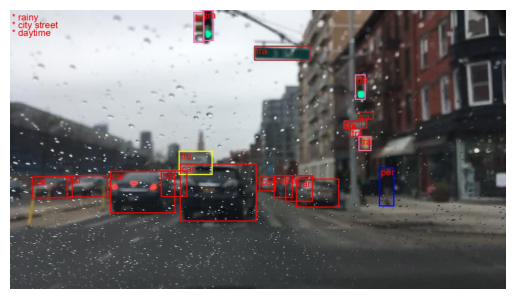

In [9]:
from PIL import Image
from matplotlib import pyplot as plt

im = Image.open("../plots/images/c845b617-f7e6bd96.jpg")
plt.axis("off")
plt.imshow(im)

## Conclusion

### Pros:
* Model is doing pretty good job given the complex dataset, data imbalance and small neural-architechture
* Model is handling day/night, weather condition, and street views pretty well.
* Despite anamolies in the annotation model is learning those noises.

### Cons:
* There are more False positives for far way small objects and for person class aswell.
* Model seems to have learned weak features and because of which its preicting objects even if they just appear like one.
* Background class also seem to have weak impact as model is prediction traffic sign and person on the wall of buildin, this could also come from annotation anomalies.